<a href="https://colab.research.google.com/github/AtifQureshi110/image_to_text/blob/main/image_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The main goal of this project is to extract information from images in the form of text. To achieve this, I employed the Transformer library along with VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer, and PyTorch. The specific model I utilized is "nlpconnect/vit-gpt2-image-captioning." This model stands out for its ability to extract comprehensive information from images at the pixel level.

Here's how it works: First, the model extracts all the details from the image pixels. It then adjusts the height and beams of the image for optimal processing. Once the pixel values and image size are specified, the model generates a sequence of token IDs, essentially converting the image information into a structured format. Finally, these token IDs are decoded back into human-readable text using a tokenizer. This process allows the model to transform visual information from images into meaningful textual descriptions.

In [ ]:
!pip install transformers -q

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import warnings
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer

# Suppress the specific warning about attention_mask
warnings.filterwarnings("ignore", category=UserWarning, message=".*attention_mask.*")


In [ ]:
model_id = "nlpconnect/vit-gpt2-image-captioning"

In [ ]:
model_id = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_id)
feature_extractor = ViTImageProcessor.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
max_length = 16 # Sets the maximum length of the generated sequence.
num_beams = 4 # Specifies the number of beams to be used in beam search during sequence generation.
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)#Opens the image using the Python Imaging Library (PIL).
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values # Uses the feature_extractor to convert the list of images into pixel values suitable for model input.
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

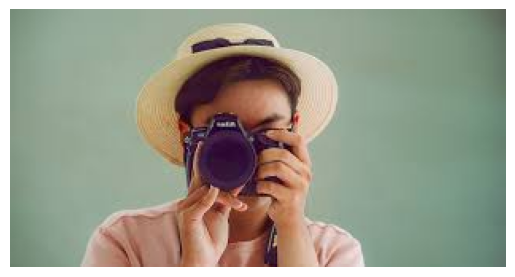

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/women.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/women.jpg'])

In [ ]:
image_info

['a man wearing a hat holding a camera']

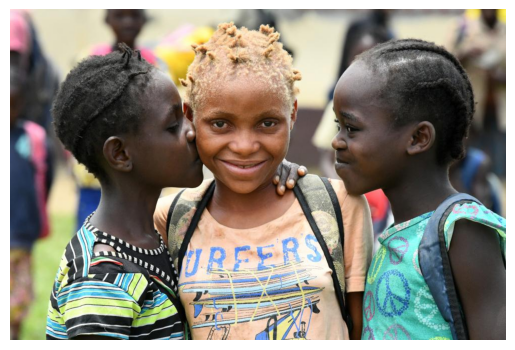

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/grils.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/grils.jpg'])

In [ ]:
image_info

['two young girls standing next to each other']

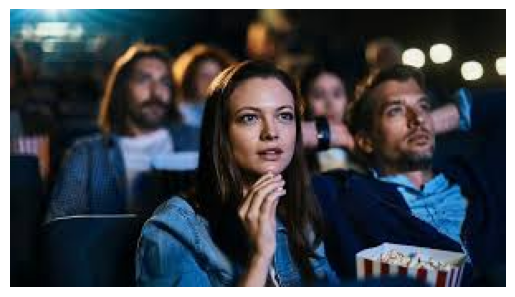

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/people.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/people.jpeg'])

In [ ]:
image_info

['a woman standing next to a man in a crowd']

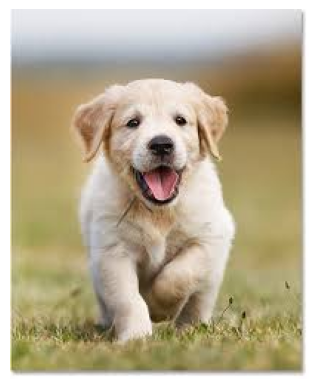

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/dog.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/dog.jpeg'])

In [ ]:
image_info

['a small white dog laying in the grass']

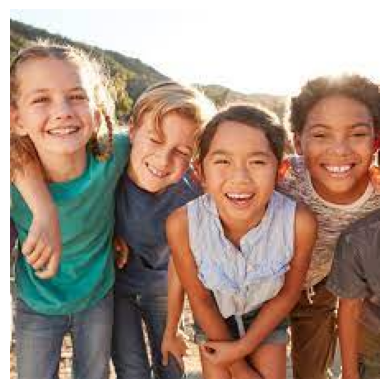

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display the image
image_path = '/content/drive/MyDrive/BERT/Transformers/images/kids.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
image_info= predict_step(['/content/drive/MyDrive/BERT/Transformers/images/kids.jpeg'])

In [ ]:
image_info

['a family posing for a picture together']